#Word tokenization

Using spacy for lemmatization. Using spacy for Croatian as there are no functions for Serbian

##Imports

In [6]:
!pip install -U spacy
!python -m spacy download hr_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 MB 6.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('hr_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [18]:
!python -m spacy download hr_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 MB 4.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('hr_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [9]:
import pandas as pd

In [164]:
import spacy




##Word Count

In [ ]:
nlp = spacy.load("hr_core_news_md")

Loading datasets and applying spacy

In [11]:


n1 = pd.read_csv("/content/n1_cleaned_with_scores.csv")
rts = pd.read_csv("/content/rts_latin.csv")
n1["spacy_doc"] =n1["headline"].astype(str).map(nlp)
rts["spacy_doc"] = rts["headline"].astype(str).map(nlp)

This is a function that counts all occurences of words. I specifically chose to only count Nouns, Proper Nouns, Verbs, and Adjectives as they are the most meaningful.

In [130]:
#Function to get word counts
def get_word_count(df):
  words={}
  for i in df['spacy_doc']:
    for t in i:
      if (str(t.pos_)=="PROPN" or str(t.pos_)=="NOUN" or str(t.pos_)=="VERB" or str(t.pos_)=="ADJ"):
        if str(t.pos_)!="PROPN":
          lemma = t.lemma_.lower()
          #make the word lower case if it is not a proper noun
        else:
          lemma=t.lemma_
          #make the word lower case if it is a proper noun

        words[lemma] = words.get(lemma, 0) + 1
    return words





During the protests in Serbia people started using a new words "Ćaci" and "Ćacilend". As these words are new they are not counted as words after spacy lemmatization. Therefore I made a function to count them specifically

In [74]:
def caci_count(df):
  caci=0
  cacilend=0
  for i in df['spacy_doc']:
    for t in i:

          if(str(t).lower()=="ćaci"):
            caci+=1
          if(str(t).lower()=="ćacilend"):
            cacilend+=1

  return caci,cacilend



In [79]:
caci_count(n1)

(50, 113)

Since one of the most common words that occur in the headlines are city names that are bigrams such as "Novi Sad" I decided to count bigrams as one unit in case two proper nouns are next to each other. This can be problematic in case there are two proper nouns next to each other that are not related to each other.

In [137]:
def get_word_count_bigram(df):
  words={}
  proper_noun_bigram=False
  current_bigram=""
  for i in df['spacy_doc']:
    for t in i:

      if (str(t.pos_)=="PROPN" or str(t.pos_)=="NOUN" or str(t.pos_)=="VERB" or str(t.pos_)=="ADJ"):
        if (proper_noun_bigram==True):
          if (t.pos_=="PROPN"):
            current_bigram+=(" "+t.lemma_)
            lemma=current_bigram
            words[lemma] = words.get(lemma, 0) + 1
            proper_noun_bigram=False
            current_bigram=""
            continue
          else:
            lemma=current_bigram
            words[lemma] = words.get(lemma, 0) + 1
            proper_noun_bigram=False
            current_bigram=""



        if str(t.pos_)!="PROPN":
          lemma = t.lemma_.lower()
        else:
          lemma=t.lemma_
          proper_noun_bigram=True
          current_bigram+=(lemma)
          continue

        words[lemma] = words.get(lemma, 0) + 1

  return words


In [138]:
n1_words=get_word_count_bigram(n1)
caci_n1=caci_count(n1)
caci_rts=caci_count(rts)
n1_words["ćaci"]=caci_n1[0]
n1_words["Ćacilend"]=caci_n1[1]
rts_words=get_word_count_bigram(rts)
rts_words["ćaci"]=caci_rts[0]
rts_words["Ćacilend"]=caci_rts[1]

Removing "a", ".","-"

In [139]:
n1_words.pop("a", None)
n1_words.pop("-", None)
n1_words.pop(".", None)
rts_words.pop("a", None)
rts_words.pop(".", None)
rts_words.pop("-", None)

39

In [140]:
from collections import Counter
counts_n1 = Counter(n1_words)
counts_n1.most_common(20)



[('student', 4298),
 ('Srbija', 2383),
 ('protest', 1958),
 ('građanin', 1778),
 ('Novi Sad', 1528),
 ('blokada', 1463),
 ('vlast', 1452),
 ('policija', 1444),
 ('dan', 1434),
 ('Vučić', 1382),
 ('nov', 1350),
 ('Beograd', 1321),
 ('izbor', 959),
 ('godina', 944),
 ('moći', 891),
 ('tražiti', 847),
 ('fakultet', 765),
 ('sav', 758),
 ('imati', 750),
 ('nemati', 746)]

In [141]:
counts_rts = Counter(rts_words)
counts_rts.most_common(20)

[('Vučić', 433),
 ('Srbija', 304),
 ('srpski', 273),
 ('izbor', 206),
 ('nov', 202),
 ('skupština', 180),
 ('protest', 165),
 ('predsednik', 152),
 ('Priština', 147),
 ('blokada', 137),
 ('student', 133),
 ('lista', 132),
 ('sav', 106),
 ('dan', 106),
 ('Novi Sad', 106),
 ('kim', 101),
 ('EU', 100),
 ('policija', 98),
 ('godina', 96),
 ('saradnja', 96)]

## Testing Betić Ner model

Tryig to use Betic ner model to find named entitiess. The issue is that this only recognizes named entities such as names and location and isolates them from other words. This model also separates beggining of the word with its end. One example is surname "Šapić". This model splits Šapić into ##pić and Ša

In [12]:
from transformers import pipeline

ner = pipeline("ner", model="classla/bcms-bertic-ner", aggregation_strategy="simple",device=0)


Device set to use cuda:0


In [144]:
def lemmatize(line):
  new_line=""

  for t in line:

        if str(t.pos_)!="PROPN":
          lemma = t.lemma_.lower()
          new_line+=(lemma+" ")
        else:
          lemma=t.lemma_
          new_line+=(lemma+" ")

  return new_line


In [145]:
n1["lemmatized"] =n1["spacy_doc"].map(lemmatize)

In [172]:
rts["lemmatized"] =rts["spacy_doc"].map(lemmatize)

In [146]:
texts = n1["lemmatized"].astype(str).tolist()


outs = ner(texts, batch_size=32)

n1["ner"] = outs


In [173]:
texts = rts["lemmatized"].astype(str).tolist()


outs = ner(texts, batch_size=32)

rts["ner"] = outs

In [155]:
n1["ner"][5]

[{'entity_group': 'PER',
  'score': np.float32(0.99742955),
  'word': 'Klasi',
  'start': 0,
  'end': 5},
 {'entity_group': 'PER',
  'score': np.float32(0.96373326),
  'word': '##ć',
  'start': 5,
  'end': 6},
 {'entity_group': 'PER',
  'score': np.float32(0.99840695),
  'word': 'Plenković',
  'start': 9,
  'end': 18},
 {'entity_group': 'PER',
  'score': np.float32(0.99815196),
  'word': 'Vučić',
  'start': 21,
  'end': 26}]

In [159]:
def get_word_count_ner(df):
  words={}
  for i in df['ner']:
    for t in i:

          lemma = str(t['word'])


          words[lemma] = words.get(lemma, 0) + 1
  return words


In [175]:
ner_words=get_word_count_ner(rts)
ner_counts = Counter(ner_words)
ner_counts.most_common(20)

[('Vučić', 759),
 ('Srbija', 567),
 ('Beograd', 186),
 ('Priština', 178),
 ('Srbin', 174),
 ('EU', 164),
 ('KiM', 121),
 ('Đurić', 113),
 ('Novi Sad', 112),
 ('RTS', 109),
 ('Brnabić', 84),
 ('Vučević', 83),
 ('Dačić', 74),
 ('Pri', 72),
 ('##ština', 58),
 ('Petković', 57),
 ('Kur', 54),
 ('SAD', 53),
 ('Macut', 49),
 ('Kosovo', 48)]

##Saving Data

In [165]:
rts_word_count=pd.DataFrame(counts_rts.most_common(len(counts_rts)))

In [91]:
n1_word_count=pd.DataFrame(counts_n1.most_common(len(counts_n1)))

In [95]:
rts_word_count.to_csv("rts_word_count.csv")

In [167]:
n1_word_count.to_csv("n1s_word_count.csv")

In [176]:
n1.to_csv("n1_lemmatized.csv")

In [177]:
rts.to_csv("rts_lemmatized.csv")

##Visualization

In [34]:
pip install wordcloud matplotlib

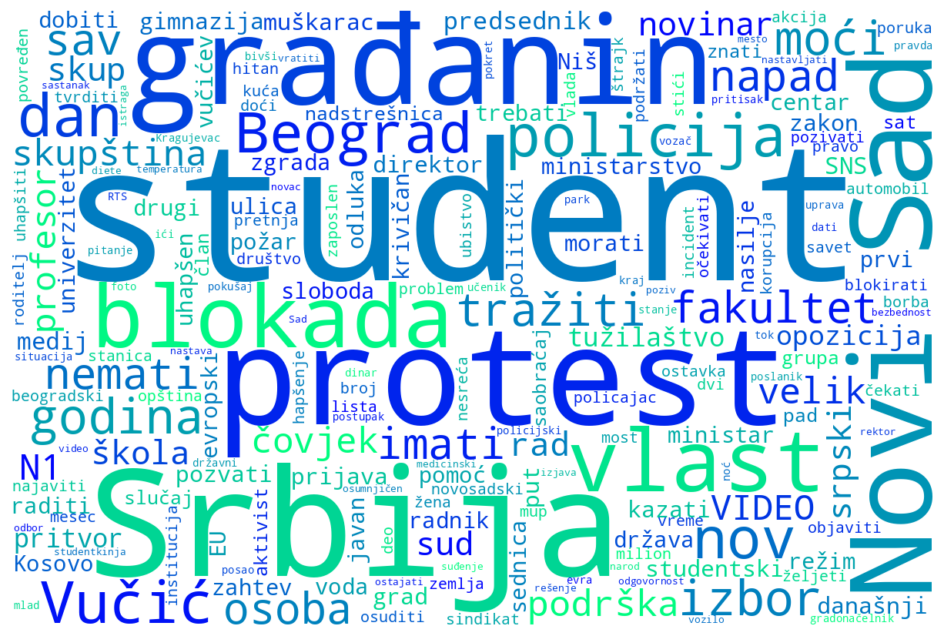

In [102]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt



wc = WordCloud(
    width=1200,
    height=800,
    background_color="white",
    colormap="winter",
    max_words=200
).generate_from_frequencies(n1_words)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

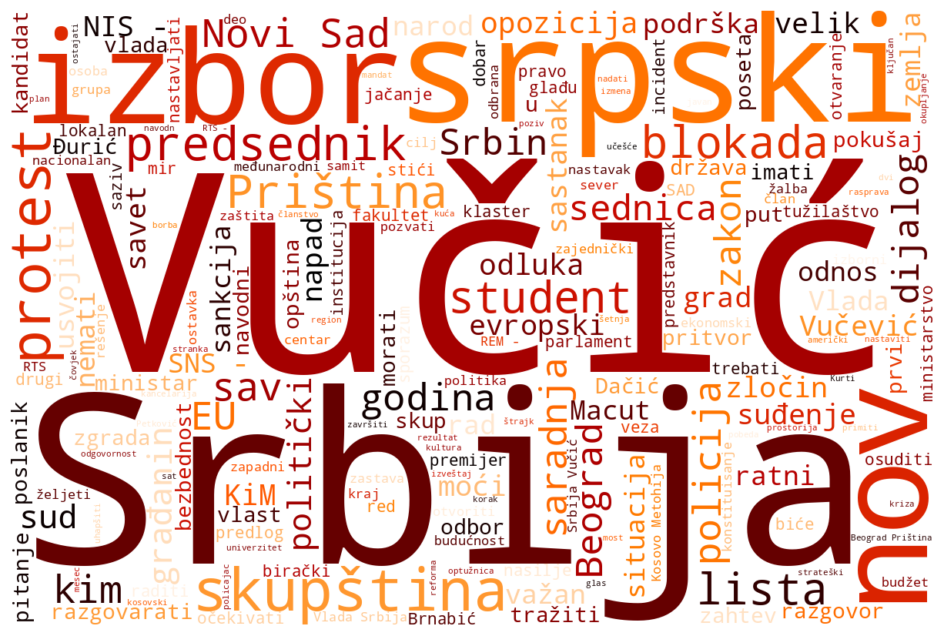

In [103]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt



wc = WordCloud(
    width=1200,
    height=800,
    background_color="white",
    colormap="gist_heat",
    max_words=200
).generate_from_frequencies(rts_words)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

/tmp/ipython-input-3311587291.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




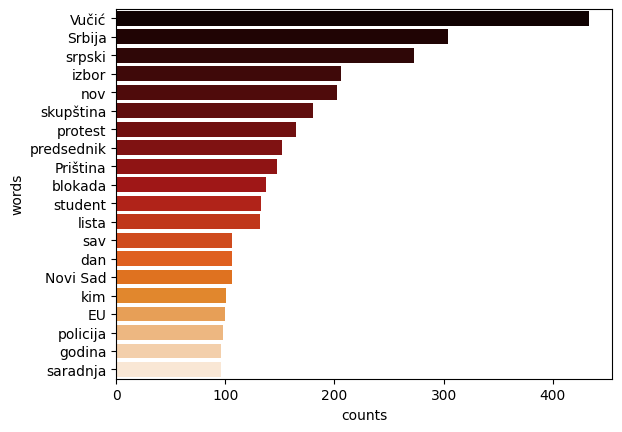

<Figure size 2000x2500 with 0 Axes>

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(data=rts_word_count.iloc[:20], x=1, y=0, orient="h",palette="gist_heat")
ax.set(xlabel="counts", ylabel="words")
plt.figure(figsize=(20, 25))

plt.show()

/tmp/ipython-input-3793505384.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




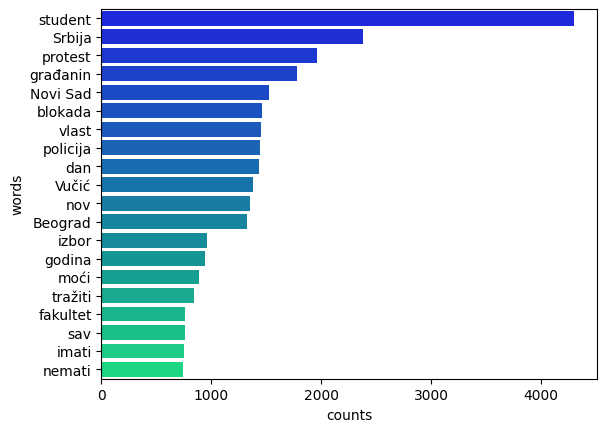

<Figure size 2000x2500 with 0 Axes>

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(data=n1_word_count.iloc[:20], x=1, y=0, orient="h",palette="winter")
ax.set(xlabel="counts", ylabel="words")
plt.figure(figsize=(20, 25))

plt.show()

##Visualization Test

Testing different visualization functions

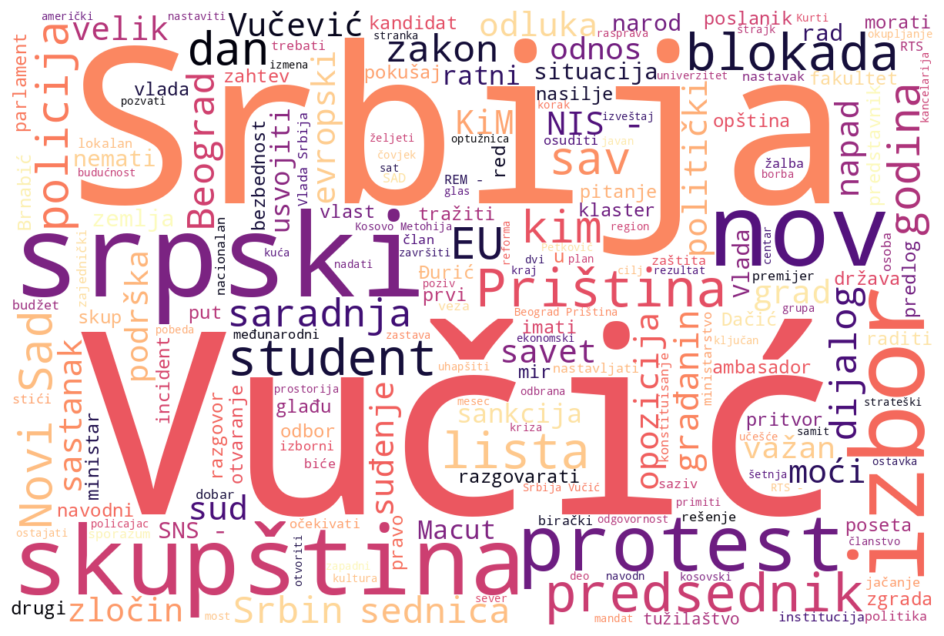

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt



wc = WordCloud(
    width=1200,
    height=800,
    background_color="white",
    colormap="magma",
    max_words=200
).generate_from_frequencies(rts_words)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

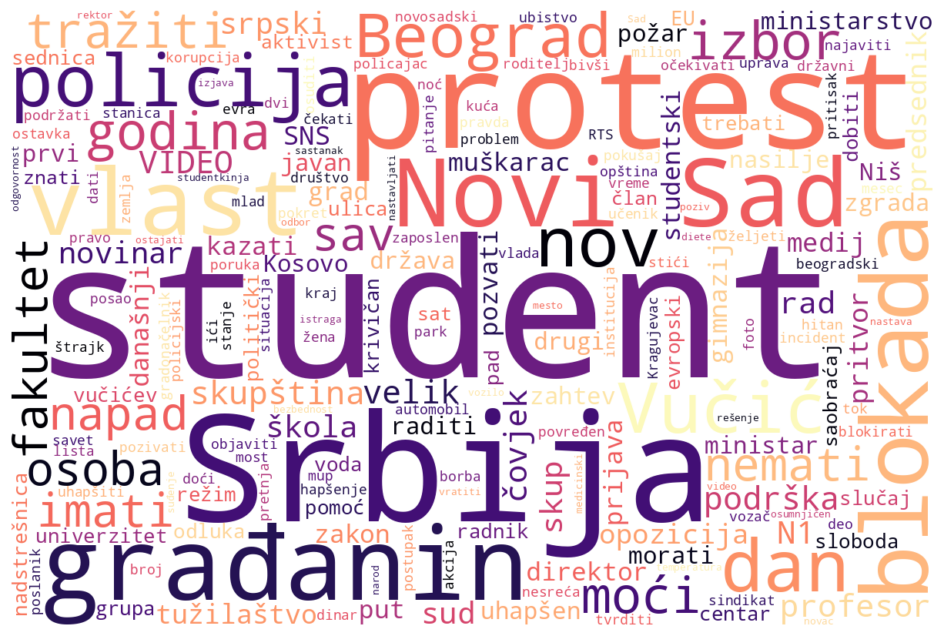

In [90]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt



wc = WordCloud(
    width=1200,
    height=800,
    background_color="white",
    colormap="magma",
    max_words=200
).generate_from_frequencies(n1_words)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [55]:
import pandas as pd

top_n = 50
s = pd.Series(rts_words).sort_values(ascending=False).head(top_n)
dfw = s.reset_index()
dfw.columns = ["word", "count"]


In [54]:
pip install plotly


In [56]:
import plotly.express as px

fig = px.bar(dfw.sort_values("count"), x="count", y="word", orientation="h",
             title=f"Top {top_n} words")
fig.show()


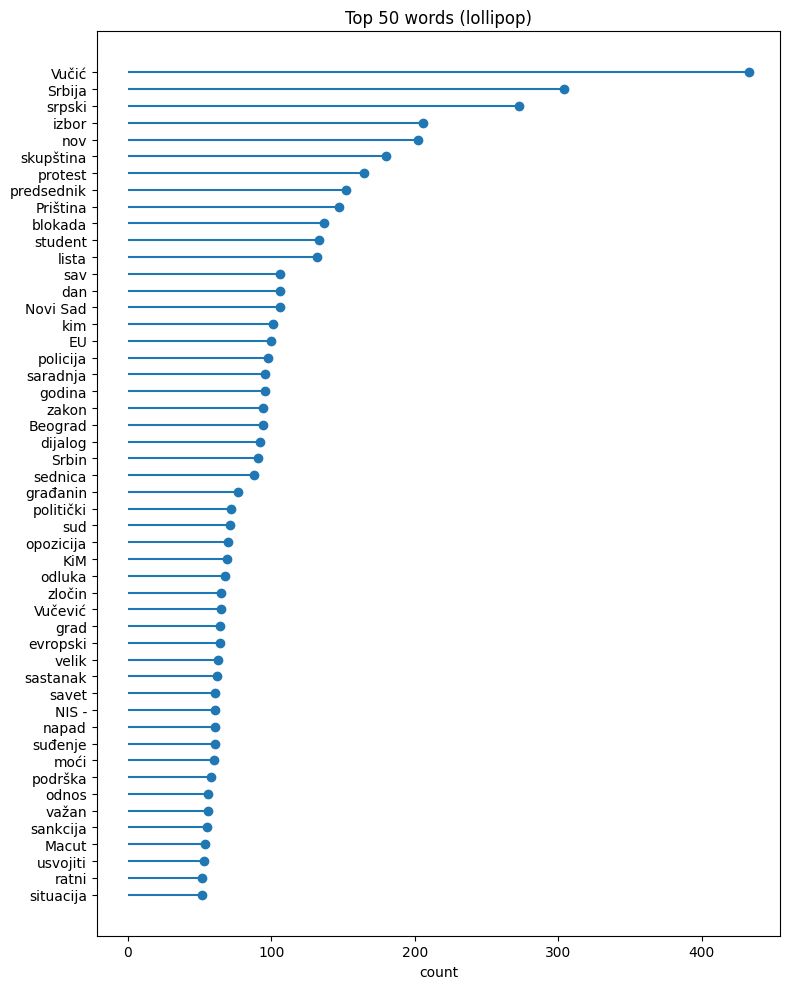

In [57]:
import matplotlib.pyplot as plt

dfp = dfw.sort_values("count")

plt.figure(figsize=(8, 10))
plt.hlines(y=dfp["word"], xmin=0, xmax=dfp["count"])
plt.plot(dfp["count"], dfp["word"], "o")
plt.title(f"Top {top_n} words (lollipop)")
plt.xlabel("count")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

dfp = dfw.sort_values("count")

plt.figure(figsize=(8, 10))
plt.hlines(y=dfp["word"], xmin=0, xmax=dfp["count"])
plt.plot(dfp["count"], dfp["word"], "o")
plt.title(f"Top {top_n} words (lollipop)")
plt.xlabel("count")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [58]:
import plotly.express as px

fig = px.treemap(dfw, path=["word"], values="count",
                 title=f"Top {top_n} words (treemap)")
fig.show()


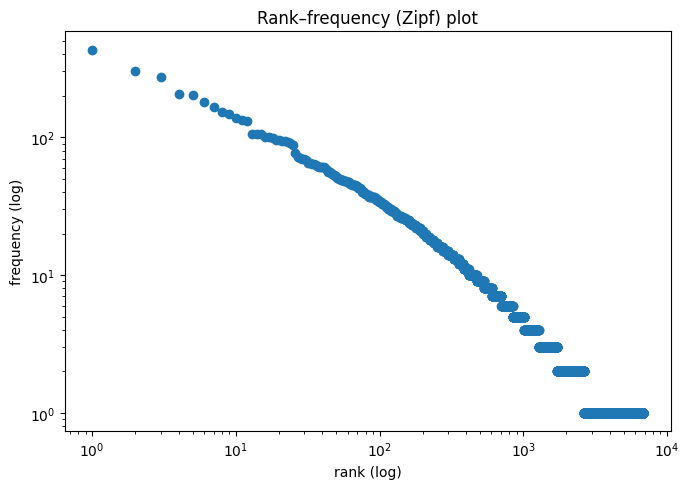

In [59]:
import numpy as np
import matplotlib.pyplot as plt

counts = pd.Series(rts_words).sort_values(ascending=False).values
ranks = np.arange(1, len(counts) + 1)

plt.figure(figsize=(7, 5))
plt.loglog(ranks, counts, marker="o", linestyle="none")
plt.xlabel("rank (log)")
plt.ylabel("frequency (log)")
plt.title("Rank–frequency (Zipf) plot")
plt.tight_layout()
plt.show()


In [95]:
counts = Counter(words)

37379

In [94]:
rts_word_count=pd.DataFrame(counts_rts.most_common(len(counts_rts)))